# Password_Strength_ Classifier - Analysis

## Packages Import

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

In [6]:
## Importing Data  
data=pd.read_csv('D:\Data Science Project\password strength/data.csv', error_bad_lines=False)
## Show the first 5 rows of Data
data.head()

b'Skipping line 2810: expected 2 fields, saw 5\nSkipping line 4641: expected 2 fields, saw 5\nSkipping line 7171: expected 2 fields, saw 5\nSkipping line 11220: expected 2 fields, saw 5\nSkipping line 13809: expected 2 fields, saw 5\nSkipping line 14132: expected 2 fields, saw 5\nSkipping line 14293: expected 2 fields, saw 5\nSkipping line 14865: expected 2 fields, saw 5\nSkipping line 17419: expected 2 fields, saw 5\nSkipping line 22801: expected 2 fields, saw 5\nSkipping line 25001: expected 2 fields, saw 5\nSkipping line 26603: expected 2 fields, saw 5\nSkipping line 26742: expected 2 fields, saw 5\nSkipping line 29702: expected 2 fields, saw 5\nSkipping line 32767: expected 2 fields, saw 5\nSkipping line 32878: expected 2 fields, saw 5\nSkipping line 35643: expected 2 fields, saw 5\nSkipping line 36550: expected 2 fields, saw 5\nSkipping line 38732: expected 2 fields, saw 5\nSkipping line 40567: expected 2 fields, saw 5\nSkipping line 40576: expected 2 fields, saw 5\nSkipping line 

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


In [7]:
## checking strength 
data['strength'].unique()

array([1, 2, 0], dtype=int64)

In [37]:
# desciption of the data
data.describe()

,strength
count,669639.000000
mean,0.990198
std,0.507947
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,2.000000


## code to check all the missing values in my dataset 

In [8]:
data.isna().sum()

password    1
strength    0
dtype: int64

In [9]:
## checking null password
data[data['password'].isnull()]

,password,strength
367579,NaN,0


In [10]:
data.dropna(inplace=True)

In [11]:
## checking null value
data.isnull().sum()

password    0
strength    0
dtype: int64

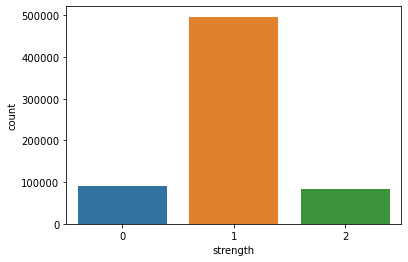

In [12]:
## plotting graph
sns.countplot(data['strength'])

In [13]:
password_tuple=np.array(data)

In [14]:
password_tuple

array([['kzde5577', 1],
       ['kino3434', 1],
       ['visi7k1yr', 1],
       ...,
       ['184520socram', 1],
       ['marken22a', 1],
       ['fxx4pw4g', 1]], dtype=object)

### shuffling randomly for robustness

In [15]:
random.shuffle(password_tuple)

In [16]:
x=[labels[0] for labels in password_tuple]
y=[labels[1] for labels in password_tuple]

In [17]:
x

['kzde5577',
 'kino3434',
 'kzde5577',
 'kino3434',
 'lamborghin1',
 'megzy123',
 'lamborghin1',
 'u6c8vhow',
 'kzde5577',
 'megzy123',
 'kzde5577',
 'kino3434',
 'AVYq1lDE4MgAZfNt',
 'asv5o9yu',
 'kzde5577',
 'as326159',
 'u6c8vhow',
 'v1118714',
 'g067057895',
 'jerusalem393',
 'visi7k1yr',
 'jytifok873',
 'u6c8vhow',
 'asv5o9yu',
 'elyass15@ajilent-ci',
 'klara-tershina3H',
 'lamborghin1',
 'megzy123',
 'schalke04',
 'asv5o9yu',
 'schalke04',
 'trabajonet9',
 'v1118714',
 'idofo673',
 'universe2908',
 'lamborghin1',
 'go7kew7a2po',
 'intel1',
 'gaymaids1',
 'gaymaids1',
 'kswa2mrv',
 'elyass15@ajilent-ci',
 'go7kew7a2po',
 'g067057895',
 'olmaz.',
 'as326159',
 'lamborghin1',
 'a2531106',
 '6975038lp',
 'yqugu927',
 'intel1',
 'asv5o9yu',
 'tamanagung6',
 'intel1',
 '6975038lp',
 'ejeko677',
 'juliel009',
 'b4NbTxDEyNgG141J',
 'c3h8bkzr',
 'prisonbreak1',
 'WUt9IZzE0OQ7PkNE',
 'klara-tershina3H',
 'kino3434',
 'idofo673',
 'memjan123',
 'go7kew7a2po',
 'calcifer32',
 'lamborghin1',


### create a custom function to split input into characters of list


In [18]:
def word_divide_char(inputs):
    character=[]
    for i in inputs:
        character.append(i)
    return character

In [19]:
word_divide_char('kzde5577')


['k', 'z', 'd', 'e', '5', '5', '7', '7']

## import TF-IDF vectorizer to convert String data into numerical data 

In [20]:
vectorizer=TfidfVectorizer(tokenizer=word_divide_char)

### apply TF-IDF vectorizer on data

In [21]:
X=vectorizer.fit_transform(x)

In [22]:
X.shape

(669639, 132)

In [23]:
vectorizer.get_feature_names()

['\x05',
 '\x06',
 '\x08',
 '\x0f',
 '\x10',
 '\x11',
 '\x12',
 '\x13',
 '\x16',
 '\x17',
 '\x19',
 '\x1b',
 '\x1c',
 '\x1d',
 '\x1e',
 ' ',
 '!',
 '"',
 '#',
 '$',
 '%',
 '&',
 '(',
 ')',
 '*',
 '+',
 '-',
 '.',
 '/',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 '{',
 '|',
 '}',
 '~',
 '\x7f',
 '\x8d',
 '¡',
 '¦',
 '¨',
 '«',
 '°',
 '±',
 '²',
 '³',
 '´',
 'µ',
 '¶',
 '·',
 '¹',
 'º',
 '¾',
 '¿',
 '×',
 'ß',
 'à',
 'á',
 'â',
 'ä',
 'å',
 'æ',
 'é',
 'ê',
 'í',
 'î',
 'ï',
 'ð',
 'ñ',
 'ò',
 'ó',
 'ô',
 'õ',
 'ö',
 '÷',
 'ù',
 'ú',
 'û',
 'ü',
 'ý',
 'þ',
 'ÿ',
 'œ',
 '—',
 '‚',
 '‹',
 '›']

In [24]:
first_document_vector=X[0]
first_document_vector

<1x132 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [25]:
first_document_vector.T.todense()

matrix([[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.56685001],
        [0.        ],
        [0.59153488],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0

In [26]:
df=pd.DataFrame(first_document_vector.T.todense(),index=vectorizer.get_feature_names(),columns=['TF-IDF'])
df.sort_values(by=['TF-IDF'],ascending=False)

,TF-IDF
7,0.591535
5,0.566850
z,0.336072
k,0.291775
d,0.285777
...,...
;,0.000000
9,0.000000
8,0.000000
6,0.000000


### split data into train & test
    
    train---> To learn the relationship within data, 
    test-->  To do predictions, and this testing data will be unseen to my model

In [29]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)

In [30]:
X_train.shape

(535711, 132)

## Apply Logistic on data as use-cas is Classification

In [31]:
clf=LogisticRegression(random_state=0,multi_class='multinomial')

In [32]:
clf.fit(X_train,y_train)

LogisticRegression(multi_class='multinomial', random_state=0)

### doing prediction for specific custom data

In [33]:
dt=np.array(['%@123abcd'])
pred=vectorizer.transform(dt)
clf.predict(pred)

array([1])

### doing prediction on X-Test data 

In [34]:
y_pred=clf.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 0])

### check Accuracy of your model using confusion_matrix,accuracy_score

In [35]:
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(accuracy_score(y_test,y_pred))

[[ 5426 12772    16]
 [ 3773 92550  2624]
 [   37  5167 11563]]
0.8178946896840094


## create report of your model 

In [36]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.59      0.30      0.40     18214
           1       0.84      0.94      0.88     98947
           2       0.81      0.69      0.75     16767

    accuracy                           0.82    133928
   macro avg       0.75      0.64      0.68    133928
weighted avg       0.80      0.82      0.80    133928



## Feature Engineering

In [40]:
def cal_len(x):
    '''
    Calculates the length of a given password.
    '''
    x=str(x)
    return len(x)

def cal_capL(x):
    '''
    Calculates the number of capital letters in the password.
    '''
    x=str(x)
    cnt=0
    for i in x:
        if(i.isupper()):
            cnt+=1
    return cnt

def cal_smL(x):
    '''
    Calculates the nu,ber of small letters in the password.
    '''
    x=str(x)
    cnt=0
    for i in x:
        if(i.islower()):
            cnt+=1
    return cnt

def cal_spc(x):
    '''
    Calculates the number of special characters in the password.
    '''
    x=str(x)
    return (len(x)-len(re.findall('[\w]',x)))


length=lambda x:cal_len(x)
capital=lambda x:cal_capL(x)
small=lambda x:cal_smL(x)
special=lambda x:cal_spc(x)

data['length']=pd.DataFrame(data.password.apply(length))
data['capital']=pd.DataFrame(data.password.apply(capital))
data['small']=pd.DataFrame(data.password.apply(small))
data['special']=pd.DataFrame(data.password.apply(special))

In [41]:
# five elements from the top
data.head()

,password,strength,length,capital,small,special
0,kzde5577,1,8,0,4,0
1,kino3434,1,8,0,4,0
2,visi7k1yr,1,9,0,7,0
3,megzy123,1,8,0,5,0
4,lamborghin1,1,11,0,10,0


In [42]:
def cal_num(x):
    '''
    Calculates the number of numeric values in the password.
    '''
    x=str(x)
    cnt=0
    for i in x:
        if(i.isnumeric()):
            cnt+=1
    return cnt

numeric=lambda x:cal_num(x)
data['numeric']=pd.DataFrame(data.password.apply(cal_num))

In [43]:
# five elements from the top
data.head()

,password,strength,length,capital,small,special,numeric
0,kzde5577,1,8,0,4,0,4
1,kino3434,1,8,0,4,0,4
2,visi7k1yr,1,9,0,7,0,2
3,megzy123,1,8,0,5,0,3
4,lamborghin1,1,11,0,10,0,1


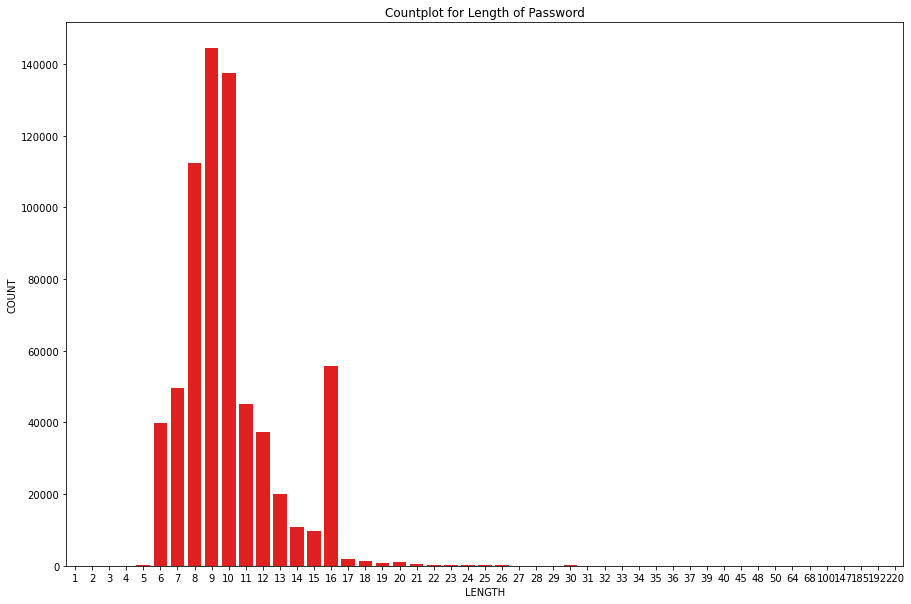

In [46]:
plt.figure(figsize=(15,10))
sns.countplot(x=data['length'],color='red')
plt.title('Countplot for Length of Password')
plt.xlabel('LENGTH')
plt.ylabel('COUNT')
plt.savefig('length.jpg')
plt.show()

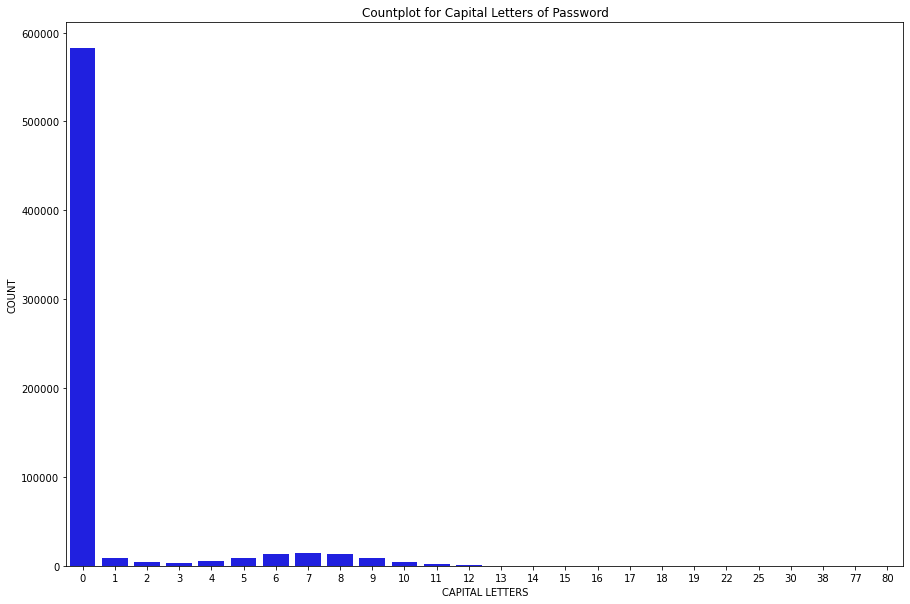

In [47]:
plt.figure(figsize=(15,10))
sns.countplot(x=data['capital'],color='blue')
plt.title('Countplot for Capital Letters of Password')
plt.xlabel('CAPITAL LETTERS')
plt.ylabel('COUNT')
plt.savefig('capital.jpg')
plt.show()

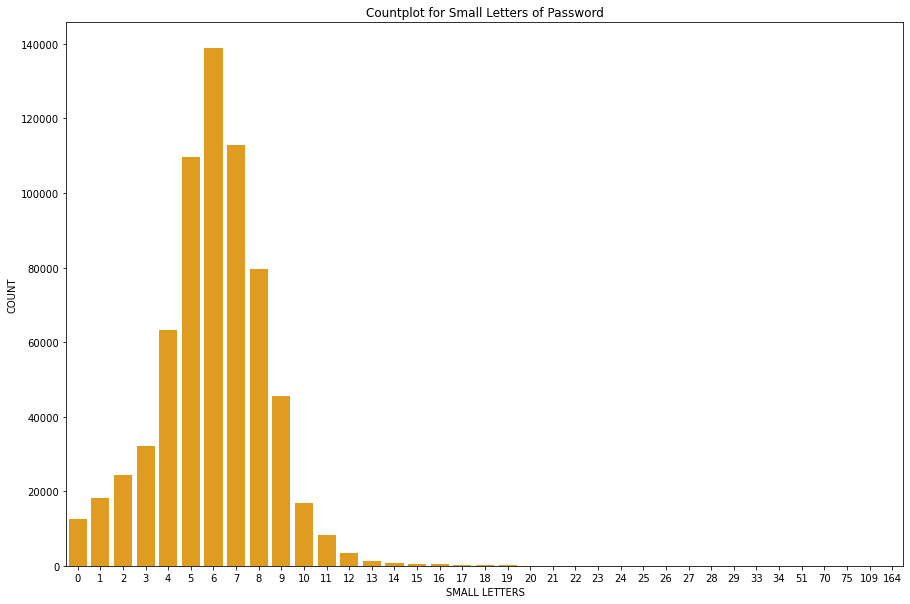

In [48]:
plt.figure(figsize=(15,10))
sns.countplot(x=data['small'],color='orange')
plt.title('Countplot for Small Letters of Password')
plt.xlabel('SMALL LETTERS')
plt.ylabel('COUNT')
plt.savefig('small.jpg')
plt.show()

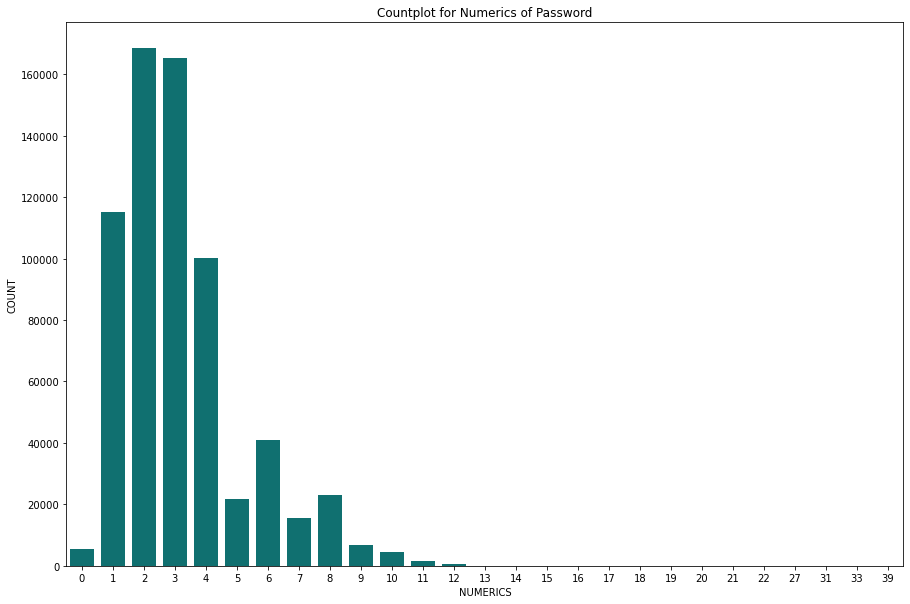

In [49]:
plt.figure(figsize=(15,10))
sns.countplot(x=data['numeric'],color='teal')
plt.title('Countplot for Numerics of Password')
plt.xlabel('NUMERICS')
plt.ylabel('COUNT')
plt.savefig('numerics.jpg')
plt.show()


In [50]:
### saving the dataset to the local disk
data.to_csv('processed.csv',index=None)